In [ ]:
D# Suprimir advertencias:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# !pip install --upgrade matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Vista previa de los datos.

In [ ]:
data = pd.read_csv('(FINAL) Cespe_Riesgo_UMA_Merged.csv', delimiter = ',')
data.head()

,Ano,Cespe,Cintiauto,Cintientrega,Epocainicio,EpocaFin,Popularidad,Riesgo (IUCN),UMAs,Caracter,Riesgo (NOM-059)
0,2015,1,20,0,1.443139e+09,1.474675e+09,0,2,2.0,0,0
1,2016,1,20,0,1.473379e+09,1.495930e+09,0,2,2.0,0,0
2,2017,1,10,0,1.504915e+09,1.527466e+09,0,2,2.0,0,0
3,2018,1,20,0,1.527466e+09,1.559002e+09,0,2,2.0,0,0
4,2019,1,0,0,1.559002e+09,1.590624e+09,0,2,2.0,0,0


### Descripción del conjunto de datos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano               406 non-null    int64  
 1   Cespe             406 non-null    int64  
 2   Cintiauto         406 non-null    int64  
 3   Cintientrega      406 non-null    int64  
 4   Epocainicio       406 non-null    float64
 5   EpocaFin          406 non-null    float64
 6   Popularidad       406 non-null    int64  
 7   Riesgo (IUCN)     406 non-null    int64  
 8   UMAs              406 non-null    float64
 9   Caracter          406 non-null    int64  
 10  Riesgo (NOM-059)  406 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 35.0 KB


### Estadísticas numéricas.

In [ ]:
data.describe()

,Ano,Cespe,Cintiauto,Cintientrega,Epocainicio,EpocaFin,Popularidad,Riesgo (IUCN),UMAs,Caracter,Riesgo (NOM-059)
count,406.000000,406.000000,406.000000,406.000000,4.060000e+02,4.060000e+02,406.000000,406.000000,406.000000,406.000000,406.000000
mean,2018.874384,25.344828,435.866995,209.955665,1.530091e+09,1.563962e+09,0.679803,2.374384,8.206897,0.022167,0.347291
std,2.501651,14.262419,1182.669833,623.011617,7.512017e+07,7.737363e+07,0.837949,1.197831,9.320973,0.147410,0.863573
min,2015.000000,1.000000,0.000000,0.000000,1.395706e+09,1.425082e+09,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2017.000000,13.000000,0.250000,0.000000,1.473379e+09,1.495930e+09,0.000000,2.000000,3.000000,0.000000,0.000000
50%,2019.000000,25.500000,18.000000,4.000000,1.515715e+09,1.558915e+09,0.000000,2.000000,6.000000,0.000000,0.000000
75%,2021.000000,38.000000,111.500000,43.750000,1.602720e+09,1.622138e+09,1.000000,2.000000,8.000000,0.000000,0.000000
max,2023.000000,50.000000,5876.000000,3769.000000,1.673222e+09,1.701475e+09,2.000000,7.000000,44.000000,1.000000,4.000000


### Matriz de correlación.

In [ ]:
data.corr()

,Ano,Cespe,Cintiauto,Cintientrega,Epocainicio,EpocaFin,Popularidad,Riesgo (IUCN),UMAs,Caracter,Riesgo (NOM-059)
Ano,1.000000,0.047791,0.028736,0.024299,0.961577,0.965082,-0.092263,-0.005691,0.029496,0.007570,-0.009473
Cespe,0.047791,1.000000,0.346307,0.355406,-0.038362,0.001761,0.304909,-0.298079,0.329938,-0.183332,-0.309252
Cintiauto,0.028736,0.346307,1.000000,0.940870,-0.042274,-0.019490,0.553427,-0.149467,0.833228,-0.054355,-0.139868
Cintientrega,0.024299,0.355406,0.940870,1.000000,-0.037279,-0.019772,0.522015,-0.115851,0.850618,-0.049862,-0.125806
Epocainicio,0.961577,-0.038362,-0.042274,-0.037279,1.000000,0.988205,-0.210829,-0.013672,-0.030310,-0.019719,-0.015283
EpocaFin,0.965082,0.001761,-0.019490,-0.019772,0.988205,1.000000,-0.205239,-0.015387,-0.030536,-0.007514,-0.006565
Popularidad,-0.092263,0.304909,0.553427,0.522015,-0.210829,-0.205239,1.000000,-0.057391,0.497872,-0.062332,-0.122333
Riesgo (IUCN),-0.005691,-0.298079,-0.149467,-0.115851,-0.013672,-0.015387,-0.057391,1.000000,-0.131020,0.078736,0.876531
UMAs,0.029496,0.329938,0.833228,0.850618,-0.030310,-0.030536,0.497872,-0.131020,1.000000,-0.116560,-0.186557
Caracter,0.007570,-0.183332,-0.054355,-0.049862,-0.019719,-0.007514,-0.062332,0.078736,-0.116560,1.000000,0.288509


<Axes: >

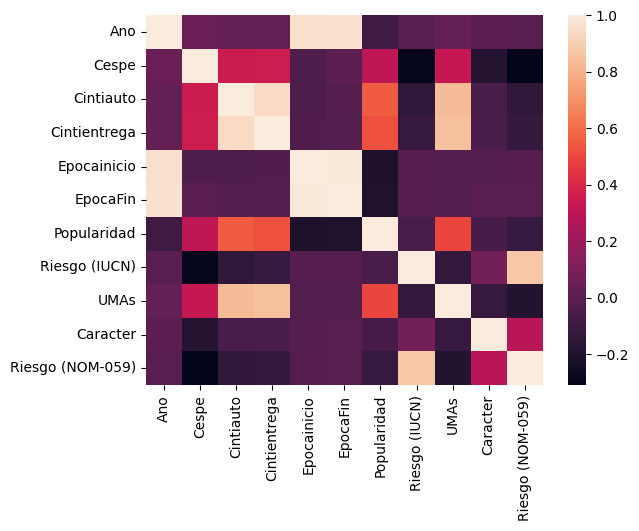

In [ ]:
import seaborn as sns
%matplotlib inline

sns.heatmap(data.corr())

### Histogramas de algunas columnas.

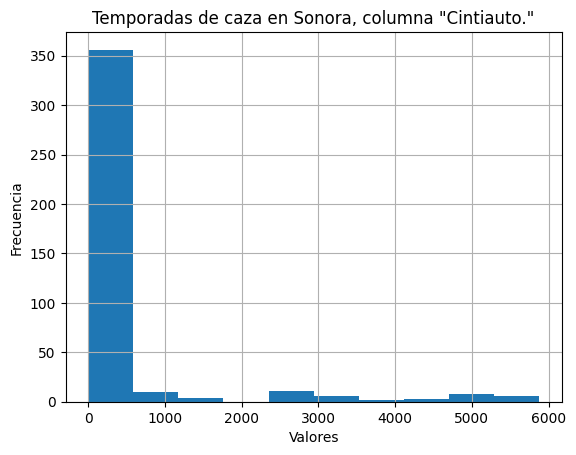

In [ ]:
data.hist(column='Cintiauto')

plt.title('Temporadas de caza en Sonora, columna "Cintiauto."')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

plt.show()

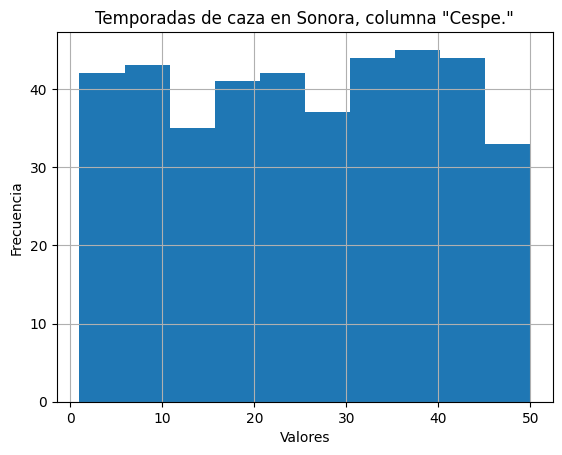

In [ ]:
data.hist(column='Cespe')

plt.title('Temporadas de caza en Sonora, columna "Cespe."')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

plt.show()

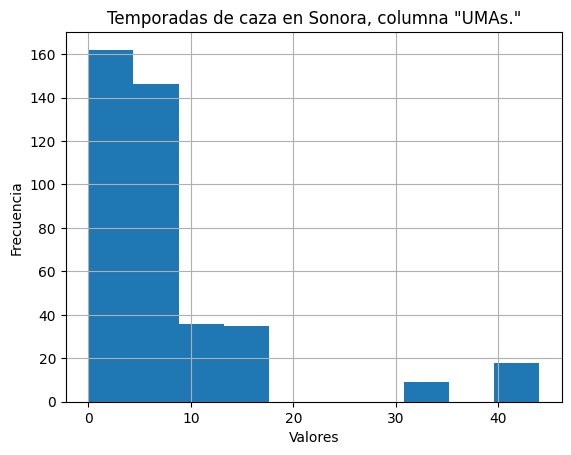

In [ ]:
data.hist(column='UMAs')

plt.title('Temporadas de caza en Sonora, columna "UMAs."')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

plt.show()

In [ ]:
data['RelacionCintilla'] = data['Cintiauto']-data['Cintientrega']
data

,Ano,Cespe,Cintiauto,Cintientrega,Epocainicio,EpocaFin,Popularidad,Riesgo (IUCN),UMAs,Caracter,Riesgo (NOM-059),RelacionCintilla
0,2015,1,20,0,1.443139e+09,1.474675e+09,0,2,2.0,0,0,20
1,2016,1,20,0,1.473379e+09,1.495930e+09,0,2,2.0,0,0,20
2,2017,1,10,0,1.504915e+09,1.527466e+09,0,2,2.0,0,0,10
3,2018,1,20,0,1.527466e+09,1.559002e+09,0,2,2.0,0,0,20
4,2019,1,0,0,1.559002e+09,1.590624e+09,0,2,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
401,2018,50,2,0,1.515715e+09,1.554163e+09,0,2,8.0,0,0,2
402,2019,50,2,0,1.547251e+09,1.585786e+09,0,2,8.0,0,0,2
403,2020,50,0,0,1.578787e+09,1.617322e+09,0,2,8.0,0,0,0
404,2021,50,0,0,1.610410e+09,1.648858e+09,0,2,8.0,0,0,0


In [ ]:
df_cespe_cintillas = data.loc[:, ['Cespe', 'RelacionCintilla']]
df_cespe_cintillas

,Cespe,RelacionCintilla
0,1,20
1,1,20
2,1,10
3,1,20
4,1,0
...,...,...
401,50,2
402,50,2
403,50,0
404,50,0


# Fase de pre procesamiento

In [ ]:
scaler = StandardScaler()
scaler.fit(df_cespe_cintillas)
df_cespe_cintillas_Scaled = scaler.transform(df_cespe_cintillas)


# Metodo del codo

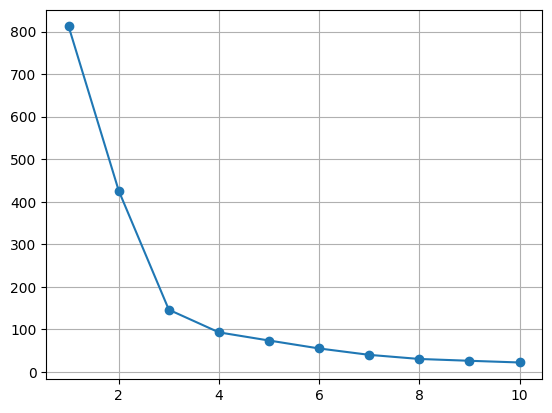

In [ ]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
    km = km.fit(df_cespe_cintillas_Scaled)

    Sum_of_squared_distances.append(km.inertia_)

# Gráfica de los resultados
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.grid(True)
plt.show()

# Analisis de la silueta

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # Mapas de colores incorporados, utilidades de manejo de mapas de colores,
import numpy as np
X = df_cespe_cintillas_Scaled

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:

    # Inicialice el clúster con valor n_clusters y un generador aleatorio
    # semilla de 10 para la reproducibilidad.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='k-means++')
    cluster_labels = clusterer.fit_predict(X)

    # El silhouette_score da el valor promedio de todas las muestras.
    # Esto da una perspectiva de la densidad y separación de los formados.
    # clúster
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promerdio de silhouette_score es :", silhouette_avg)

Para n_clusters = 2 El promerdio de silhouette_score es : 0.69668474296093
Para n_clusters = 3 El promerdio de silhouette_score es : 0.5936747437461104
Para n_clusters = 4 El promerdio de silhouette_score es : 0.5508247837889348
Para n_clusters = 5 El promerdio de silhouette_score es : 0.5459035219596936
Para n_clusters = 6 El promerdio de silhouette_score es : 0.5623553543249349
Para n_clusters = 7 El promerdio de silhouette_score es : 0.5476718922106091
Para n_clusters = 8 El promerdio de silhouette_score es : 0.5477773752349719
Para n_clusters = 9 El promerdio de silhouette_score es : 0.5399946461801192
Para n_clusters = 10 El promerdio de silhouette_score es : 0.5120851708619202


In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
X = df_cespe_cintillas_Scaled
k_means.fit(X)

KMeans(n_clusters=2, n_init=12)

In [ ]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
data['Cluster'] = k_means_labels

In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.00540513,  3.51322564],
       [-0.07162517, -0.25028257]])

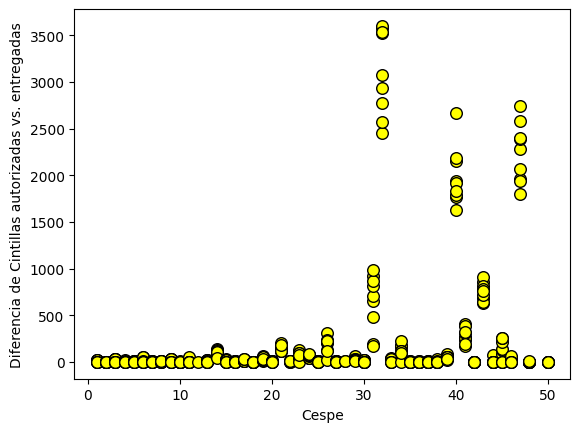

In [ ]:
plt.scatter(df_cespe_cintillas['Cespe'], df_cespe_cintillas['RelacionCintilla'],
c='yellow', marker='o', edgecolor='black', s=70)
plt.xlabel('Cespe')
plt.ylabel('Diferencia de Cintillas autorizadas vs. entregadas')
plt.show()


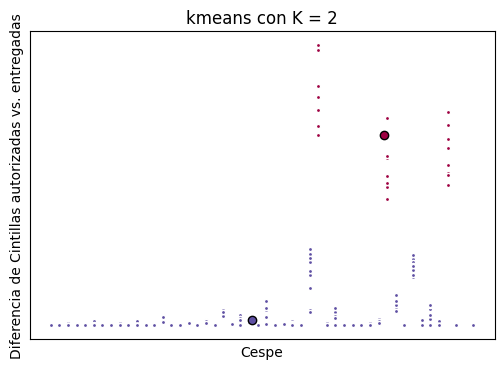

In [ ]:
Fig = plt.figure(figsize = (6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))



ax = Fig.add_subplot(1, 1, 1)


for k, col in zip(range(len(k_means_cluster_centers)), colors):

    my_members = (k_means_labels == k)

    # Defina el centroide o el centro de clúster.
    cluster_center = k_means_cluster_centers[k]

    # Traza los puntos de datos con color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Traza los centroides con color especificado, pero con un contorno más oscuro
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Título de la trama
ax.set_title('kmeans con K = 2')

# Eliminar las 'ticks' del eje X
ax.set_xticks(())

# Eliminar las 'ticks' del eje Y
ax.set_yticks(())

plt.xlabel('Cespe')
plt.ylabel('Diferencia de Cintillas autorizadas vs. entregadas')

# Muestra el gráfico
plt.show()

### Este análisis entre el eje X (cespe) y el eye Y (Relación entre las cintillas totales vs. las cintillas entregadas) refleja que el comportamiento se divide principalmente de dos formas: El primer grupo a la izquierda indica que en estas especies se utilizan muchas de las cintillas autorizadas, por lo que se debe mantener precación en la disminución de la población de estas especies; por otra parte, el segundo agrupamiento indica que de todas las cintillas permitidas en las temporadas de caza, en realidad son pocas las que se utilizan, por lo que no se espera un impacto en la conservación de este grupo de especies.

In [ ]:
data.head()

,Ano,Cespe,Cintiauto,Cintientrega,Epocainicio,EpocaFin,Popularidad,Riesgo (IUCN),UMAs,Caracter,Riesgo (NOM-059),RelacionCintilla,Cluster
0,2015,1,20,0,1.443139e+09,1.474675e+09,0,2,2.0,0,0,20,1
1,2016,1,20,0,1.473379e+09,1.495930e+09,0,2,2.0,0,0,20,1
2,2017,1,10,0,1.504915e+09,1.527466e+09,0,2,2.0,0,0,10,1
3,2018,1,20,0,1.527466e+09,1.559002e+09,0,2,2.0,0,0,20,1
4,2019,1,0,0,1.559002e+09,1.590624e+09,0,2,2.0,0,0,0,1


In [ ]:
data_fin = data

In [ ]:
data_fin.head(100)

,Ano,Cespe,Cintiauto,Cintientrega,Epocainicio,EpocaFin,Popularidad,Riesgo (IUCN),UMAs,Caracter,Riesgo (NOM-059),RelacionCintilla,Cluster
0,2015,1,20,0,1.443139e+09,1.474675e+09,0,2,2.0,0,0,20,1
1,2016,1,20,0,1.473379e+09,1.495930e+09,0,2,2.0,0,0,20,1
2,2017,1,10,0,1.504915e+09,1.527466e+09,0,2,2.0,0,0,10,1
3,2018,1,20,0,1.527466e+09,1.559002e+09,0,2,2.0,0,0,20,1
4,2019,1,0,0,1.559002e+09,1.590624e+09,0,2,2.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,13,18,0,1.443139e+09,1.474675e+09,0,2,7.0,0,0,18,1
96,2016,13,18,0,1.473379e+09,1.495930e+09,0,2,7.0,0,0,18,1
97,2017,13,18,0,1.483920e+09,1.527379e+09,0,2,7.0,0,0,18,1
98,2018,13,15,0,1.515456e+09,1.558915e+09,0,2,7.0,0,0,15,1


In [ ]:
path = 'PROFEPA_Datos_Con_Clusters.csv'

In [ ]:
data_fin.to_csv(path, index = False)